In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
class plot_diagram():
    def __init__(self, x, y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.x = x.numpy()
        self.y = y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.loss_function = [criterion(forward(x, w.data), y) for w.data in self.parameter_values]
        w.data = start
        
    def __call__(self, y_hat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.x, y_hat.detach().numpy())
        plt.plot(self.x, self.y, 'ro')
        plt.xlabel('A')
        plt.ylim(-20, 20)
        
        plt.subplot(211)
        plt.title('Data space (top) Estimated Line (bottom) Iteration ' + str(n))
        plt.plot(self.parameter_values.numpy(), self.loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel('B')
        plt.figure()
        
    def __del__(self): # Destructor
        plt.close('all')

In [7]:
# Create the f(X) with a slope of -3
x = torch.arange(-3, 3, 0.1).view(-1, 1)
y = -3 * x

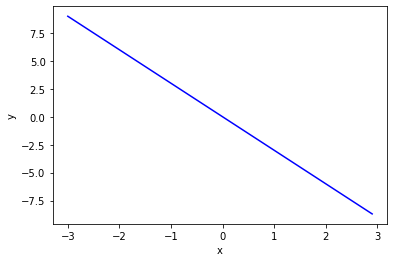

In [10]:
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

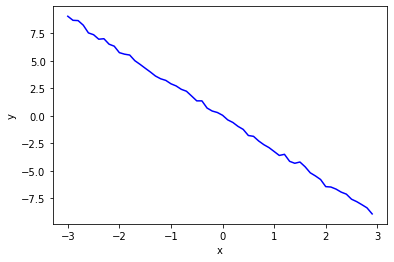

In [57]:
# Add some noise to f(X) and save it in Y
y = y + 0.1 * torch.randn(x.size())
plt.plot(x.numpy(), y.numpy(), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [58]:
# Create forward function for prediction
def forward(x, w):
    return w * x

In [59]:
def criterion(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

In [97]:
learning_rate = 0.1
loss_arr = []
w = torch.tensor(-10.0, requires_grad=True)

In [98]:
gradient_plot = plot_diagram(x, y, w, stop = 5)

In [99]:
# Define a function for train the model
def train_model(iter, loss_list):
    for epoch in range(iter):
        y_hat = forward(x, w)
        loss = criterion(y_hat, y)
#         print(loss.item())
        gradient_plot(y_hat, w, loss.item(), epoch)
        loss_list.append(loss.item())
        loss.backward()
        w.data = w.data - learning_rate * w.grad.data
        w.grad.data.zero_()

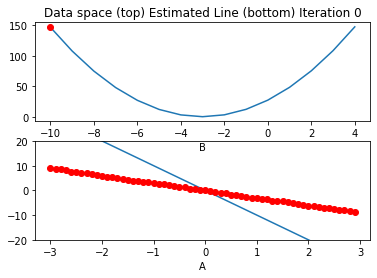

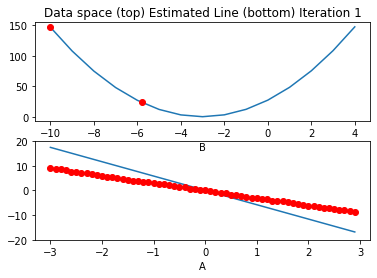

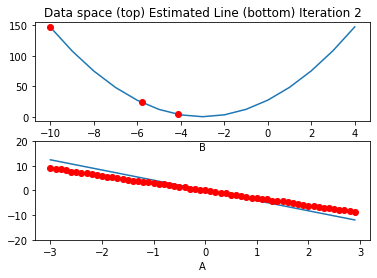

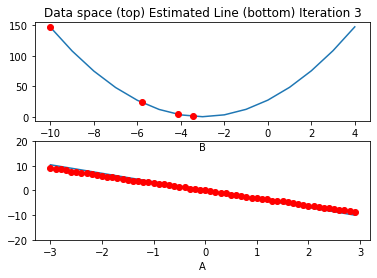

<Figure size 432x288 with 0 Axes>

In [100]:
train_model(4, loss_arr)

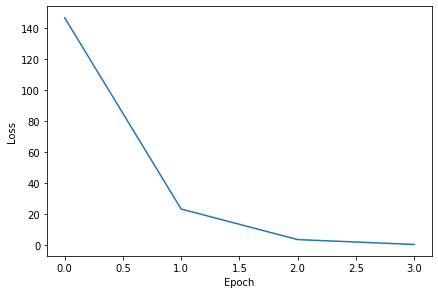

In [48]:
plt.plot(loss_arr) # Plotted by epoch indirectly because epoch is in range(4)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

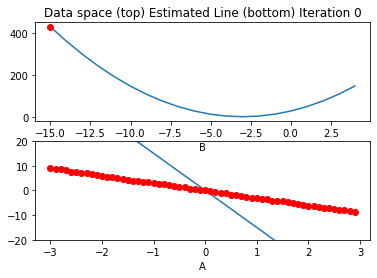

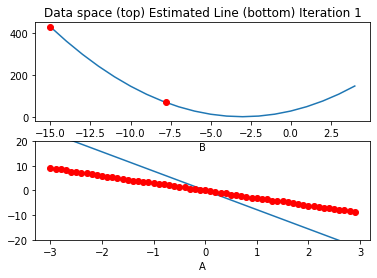

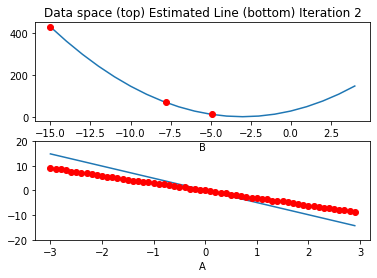

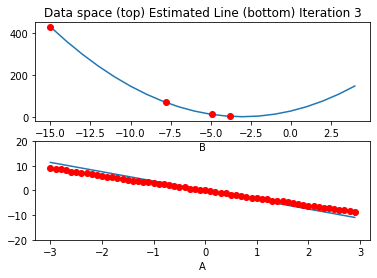

<Figure size 432x288 with 0 Axes>

In [101]:
# Practice: Create w with the inital value of -15.0
w = torch.tensor(-15.0, requires_grad=True)
gradient_plot = plot_diagram(x, y, w, stop = 5)
loss_arr_temp = []
train_model(4, loss_arr_temp)

In [102]:
# Practice: Create LOSS2 list
loss_arr_2 = []
w = torch.tensor(-15.0, requires_grad = True)
gradient_plot = plot_diagram(x, y, w, stop = 5)
def my_train_model(iter):
    for epoch in range(iter):
        y_hat = forward(x, w)
        loss = criterion(y_hat, y)
        gradient_plot(y_hat, w.data, loss.item(), epoch)
        loss_arr_2.append(loss.item())
        loss.backward()
        w.data = w.data - learning_rate * w.grad.data
        w.grad.data.zero_()

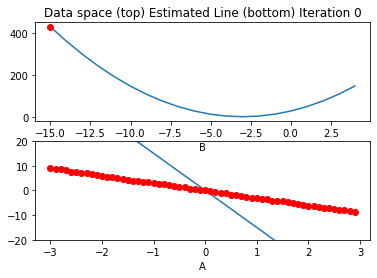

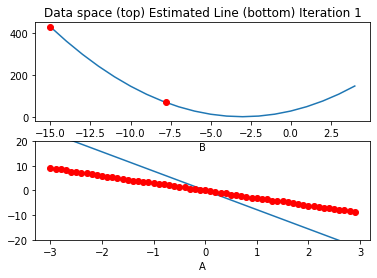

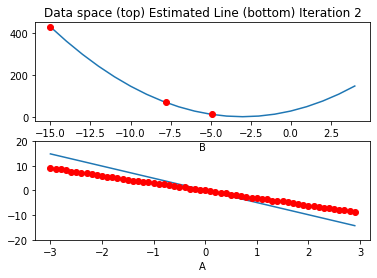

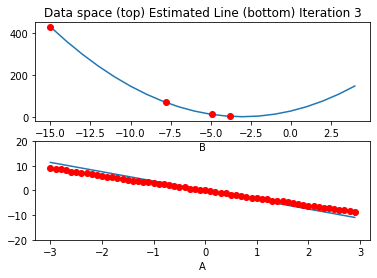

<Figure size 432x288 with 0 Axes>

In [103]:
my_train_model(4)

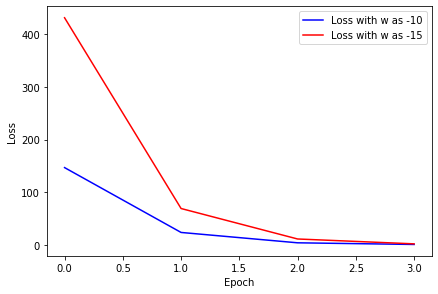

In [107]:
# Practice: Plot the list LOSS2 and LOSS
plt.plot(loss_arr, color='blue', label='Loss with w as -10')
plt.plot(loss_arr_2, color='red', label='Loss with w as -15')
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()